# HW Set 6 - Computational Physics
## Due March 24, 2020
---


**Problem 1: Terminal Velocity**

When jumping from an airplane, you will most often have a parachute to slow your fall.  Here let's consider a very simple example in which the frictional drag force is linearly dependent on the velocity:

$$
\frac{dv}{dt} = a - bv
$$

where $a$ and $b$ are constants.  In our case $a$ corresponds to the acceleration due to gravity, and $b$ is a constant from drag.  Note that the drag force is negative, indicating it opposes the motion.  Use the Euler method to solve for $v$ as a function of time and plot your results.  A convenient choice of parameters is $a=10$ and $b=1$.  You should find that $v$ approaches a constant value at long times: this is the terminal velocity.   If you open your chute immediately after jumping from the plane, you will have $v_{\rm initial}\sim1$ m/s, but if you wait a minute or so, you will have $v_{\rm initial}\sim50$  m/s.  Plot both $v(t)$ curves on the same plot with a legend.

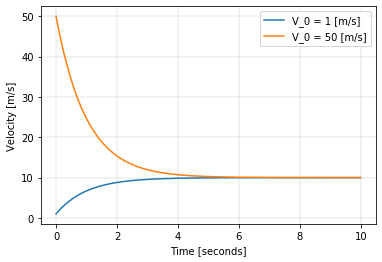

In [3]:
from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show, grid, legend

def f(v,t):
    α = 10.0
    β = 1.0
    return α - β*v

a = 0.0      # Start of the interval
b = 10.0     # End of the interval
N = 1000     # Number of steps
h = (b-a)/N  # Size of a single step
v1 = 1.0     # initial condition #1
v2 = 50.0    # initial condition #2

tpoints = arange(a,b,h)
v1points = []
v2points = []

for t in tpoints:
    v1points.append(v1)
    v2points.append(v2)
    v1 += h*f(v1,t)
    v2 += h*f(v2,t)
    
plot(tpoints,v1points, tpoints,v2points)
xlabel("Time [seconds]")
ylabel("Velocity [m/s]")
grid(color='k', linestyle='-', linewidth=0.1)
legend(['V_0 = 1 [m/s]','V_0 = 50 [m/s]'])
show()

---


**Problem 2: Coupled Radioactive Decay**

Here is a radioactive decay problem involving two types of nuclei
$A$ and $B$ with populations $N_A(t)$ and $N_B(t)$.  Given that type $A$ nuclei
decay to form type $B$ nuclei, when then also decay according to

\begin{align}
\frac{dN_A}{dt} &= -\frac{N_A}{\tau_A}\\
\frac{dN_B}{dt} &= \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}
\end{align}

where $\tau_A$ and $\tau_B$ are the decay time constants for each time of nucleus.  Use the Euler, RK2, or RK4 method to solve these coupled equations for $N_A$ and $N_B$ as functions of time.  Explore the behavior found for different values of the ratio $\tau_A/\tau_B$.  


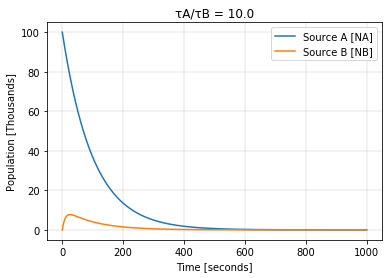

In [4]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show, grid, legend, title

# Define our ordinary differential equations
def f(r,t):
    NA  = r[0]
    NB  = r[1]
    NAt = -NA/τA
    NBt = NA/τA - NB/τB
    return array([NAt,NBt],float)
    
τA = 100.0    # decay time in [seconds]
τB = 10.0   # decay time in [seconds]

# Time range and step size
a = 0.0
b = 1.0e3
N = 1e5
h = (b-a)/N

tpoints = arange(a,b,h)


NApoints = []
NBpoints = []

# Initial population in the thousands (rabbit,fox)
r = array([100.0,0.0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    NApoints.append(r[0])
    NBpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
plot(tpoints,NApoints,tpoints,NBpoints)
legend(['Source A [NA]','Source B [NB]'])
xlabel("Time [seconds]")
ylabel("Population [Thousands]")
grid(color='k', linestyle='-', linewidth=0.1)
title(f'τA/τB = {τA/τB}')

show()

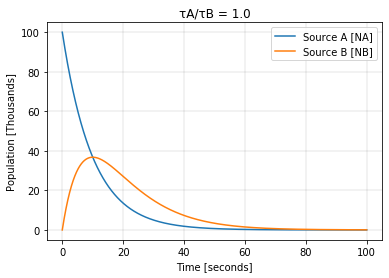

In [5]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show, grid, legend, title

# Define our ordinary differential equations
def f(r,t):
    NA  = r[0]
    NB  = r[1]
    NAt = -NA/τA
    NBt = NA/τA - NB/τB
    return array([NAt,NBt],float)
    
τA = 10.0    # decay time in [seconds]
τB = 10.0   # decay time in [seconds]

# Time range and step size
a = 0.0
b = 100
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)


NApoints = []
NBpoints = []

# Initial population in the thousands (rabbit,fox)
r = array([100.0,0.0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    NApoints.append(r[0])
    NBpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
plot(tpoints,NApoints,tpoints,NBpoints)
legend(['Source A [NA]','Source B [NB]'])
xlabel("Time [seconds]")
ylabel("Population [Thousands]")
grid(color='k', linestyle='-', linewidth=0.1)
title(f'τA/τB = {τA/τB}')

show()

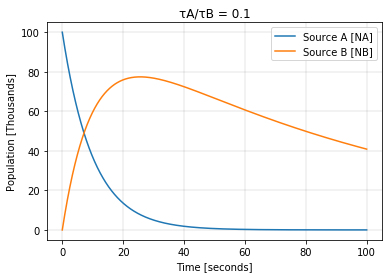

In [6]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show, grid, legend, title

# Define our ordinary differential equations
def f(r,t):
    NA  = r[0]
    NB  = r[1]
    NAt = -NA/τA
    NBt = NA/τA - NB/τB
    return array([NAt,NBt],float)
    
τA = 10.0    # decay time in [seconds]
τB = 100.0   # decay time in [seconds]

# Time range and step size
a = 0.0
b = 100.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)


NApoints = []
NBpoints = []

# Initial population in the thousands (rabbit,fox)
r = array([100.0,0.0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    NApoints.append(r[0])
    NBpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
plot(tpoints,NApoints,tpoints,NBpoints)
legend(['Source A [NA]','Source B [NB]'])
xlabel("Time [seconds]")
ylabel("Population [Thousands]")
grid(color='k', linestyle='-', linewidth=0.1)
title(f'τA/τB = {τA/τB}')

show()

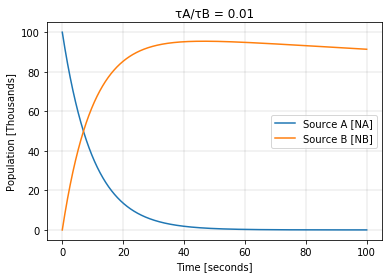

In [7]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show, grid, legend, title

# Define our ordinary differential equations
def f(r,t):
    NA  = r[0]
    NB  = r[1]
    NAt = -NA/τA
    NBt = NA/τA - NB/τB
    return array([NAt,NBt],float)
    
τA = 10.0    # decay time in [seconds]
τB = 1000.0   # decay time in [seconds]

# Time range and step size
a = 0.0
b = 100.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)


NApoints = []
NBpoints = []

# Initial population in the thousands (rabbit,fox)
r = array([100.0,0.0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    NApoints.append(r[0])
    NBpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
plot(tpoints,NApoints,tpoints,NBpoints)
legend(['Source A [NA]','Source B [NB]'])
xlabel("Time [seconds]")
ylabel("Population [Thousands]")
grid(color='k', linestyle='-', linewidth=0.1)
title(f'τA/τB = {τA/τB}')

show()

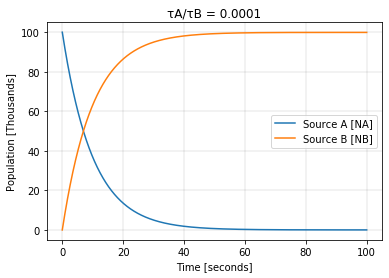

In [8]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show, grid, legend, title

# Define our ordinary differential equations
def f(r,t):
    NA  = r[0]
    NB  = r[1]
    NAt = -NA/τA
    NBt = NA/τA - NB/τB
    return array([NAt,NBt],float)
    
τA = 10.0    # decay time in [seconds]
τB = 1.0e5   # decay time in [seconds]

# Time range and step size
a = 0.0
b = 100.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)


NApoints = []
NBpoints = []

# Initial population in the thousands (rabbit,fox)
r = array([100.0,0.0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    NApoints.append(r[0])
    NBpoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
plot(tpoints,NApoints,tpoints,NBpoints)
legend(['Source A [NA]','Source B [NB]'])
xlabel("Time [seconds]")
ylabel("Population [Thousands]")
grid(color='k', linestyle='-', linewidth=0.1)
title(f'τA/τB = {τA/τB}')

show()

As the $\frac{\tau_A}{\tau_B}$ ratio decreases, the daughter population is alive for a longer period of time and vice versa.

---

**Problem 3: Cannon Shell Trajectories**

(a) Use your method of choice to calculate cannon shell trajectories ignoring both air drag and the effect of air density.  Plot your results for $v_{init}=700$ m/s, and firing angles of 30, 40, 45, and 50 degrees.  Compare your results (max height and range) with the exact solution, and with the figure on the left.  Use the values in the figure caption.  

(b) Next, include the drag force and reproduce the figure on the right.  Note the scales have changed. 

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/cannon1.png" />


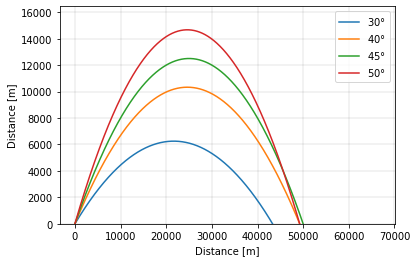

In [9]:
from numpy import array,arange,pi,sqrt,square,cos,sin
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim

# Define our ordinary differential equations
def f(r,t):
    g = 9.8
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    
    v = sqrt(square(vx)+square(vy))
    
    drag = 0
    fxx = -drag*vx*v 
    fyy = -g -drag*vy*v 
    
    return array([vx,fxx,vy,fyy],float)

# Time range and step size
a = 0.0
b = 110.0
N = 11000
h = (b-a)/N

tpoints = arange(a,b,h)

x30points = []
y30points = []
vx30points = []
vy30points = []

x40points = []
y40points = []
vx40points = []
vy40points = []

x45points = []
y45points = []
vx45points = []
vy45points = []

x50points = []
y50points = []
vx50points = []
vy50points = []


θ30 = 30
θ40 = 40
θ45 = 45
θ50 = 50

θ = θ30*pi/180

r30 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x30points.append(r30[0])
    y30points.append(r30[2])
    vx30points.append(r30[1])
    vy30points.append(r30[3])
    
    k1 = h*f(r30,t)
    k2 = h*f(r30+0.5*k1,t+0.5*h)
    k3 = h*f(r30+0.5*k2,t+0.5*h)
    k4 = h*f(r30+k3,t+h)
    r30 += (k1+2*k2+2*k3+k4)/6
    

θ = θ40*pi/180

r40 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x40points.append(r40[0])
    y40points.append(r40[2])
    vx40points.append(r40[1])
    vy40points.append(r40[3])
    
    k1 = h*f(r40,t)
    k2 = h*f(r40+0.5*k1,t+0.5*h)
    k3 = h*f(r40+0.5*k2,t+0.5*h)
    k4 = h*f(r40+k3,t+h)
    r40 += (k1+2*k2+2*k3+k4)/6
    

    
θ = θ45*pi/180

r45 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x45points.append(r45[0])
    y45points.append(r45[2])
    vx45points.append(r45[1])
    vy45points.append(r45[3])
    
    k1 = h*f(r45,t)
    k2 = h*f(r45+0.5*k1,t+0.5*h)
    k3 = h*f(r45+0.5*k2,t+0.5*h)
    k4 = h*f(r45+k3,t+h)
    r45 += (k1+2*k2+2*k3+k4)/6
    
    
θ = θ50*pi/180

r50 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x50points.append(r50[0])
    y50points.append(r50[2])
    vx50points.append(r50[1])
    vy50points.append(r50[3])
    
    k1 = h*f(r50,t)
    k2 = h*f(r50+0.5*k1,t+0.5*h)
    k3 = h*f(r50+0.5*k2,t+0.5*h)
    k4 = h*f(r50+k3,t+h)
    r50 += (k1+2*k2+2*k3+k4)/6
    
plot(x30points,y30points, 
     x40points,y40points, 
     x45points,y45points,
     x50points,y50points)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend([f'{θ30}$\degree$',f'{θ40}$\degree$',f'{θ45}$\degree$',f'{θ50}$\degree$'])
ylim(bottom=0)
grid(color='k', linestyle='-', linewidth=0.1)

show()

This matches the figure above. 

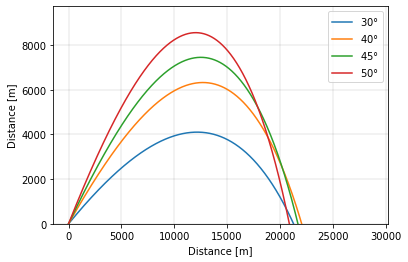

In [10]:
from numpy import array,arange,pi,sqrt,square,cos,sin
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim

# Define our ordinary differential equations
def f(r,t):
    g = 9.8
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    
    v = sqrt(square(vx)+square(vy))
    
    drag = 4e-5
    fxx = -drag*vx*v 
    fyy = -g -drag*vy*v 
    
    return array([vx,fxx,vy,fyy],float)

# Time range and step size
a = 0.0
b = 100.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)

x30dragpoints = []
y30dragpoints = []
vx30dragpoints = []
vy30dragpoints = []

x40dragpoints = []
y40dragpoints = []
vx40dragpoints = []
vy40dragpoints = []

x45dragpoints = []
y45dragpoints = []
vx45dragpoints = []
vy45dragpoints = []

x50dragpoints = []
y50dragpoints = []
vx50dragpoints = []
vy50dragpoints = []


θ30 = 30
θ40 = 40
θ45 = 45
θ50 = 50

θ = θ30*pi/180

r30 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x30dragpoints.append(r30[0])
    y30dragpoints.append(r30[2])
    vx30dragpoints.append(r30[1])
    vy30dragpoints.append(r30[3])
    
    k1 = h*f(r30,t)
    k2 = h*f(r30+0.5*k1,t+0.5*h)
    k3 = h*f(r30+0.5*k2,t+0.5*h)
    k4 = h*f(r30+k3,t+h)
    r30 += (k1+2*k2+2*k3+k4)/6
    

θ = θ40*pi/180

r40 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x40dragpoints.append(r40[0])
    y40dragpoints.append(r40[2])
    vx40dragpoints.append(r40[1])
    vy40dragpoints.append(r40[3])
    
    k1 = h*f(r40,t)
    k2 = h*f(r40+0.5*k1,t+0.5*h)
    k3 = h*f(r40+0.5*k2,t+0.5*h)
    k4 = h*f(r40+k3,t+h)
    r40 += (k1+2*k2+2*k3+k4)/6
    

    
θ = θ45*pi/180

r45 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x45dragpoints.append(r45[0])
    y45dragpoints.append(r45[2])
    vx45dragpoints.append(r45[1])
    vy45dragpoints.append(r45[3])
    
    k1 = h*f(r45,t)
    k2 = h*f(r45+0.5*k1,t+0.5*h)
    k3 = h*f(r45+0.5*k2,t+0.5*h)
    k4 = h*f(r45+k3,t+h)
    r45 += (k1+2*k2+2*k3+k4)/6
    
    
θ = θ50*pi/180

r50 = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    x50dragpoints.append(r50[0])
    y50dragpoints.append(r50[2])
    vx50dragpoints.append(r50[1])
    vy50dragpoints.append(r50[3])
    
    k1 = h*f(r50,t)
    k2 = h*f(r50+0.5*k1,t+0.5*h)
    k3 = h*f(r50+0.5*k2,t+0.5*h)
    k4 = h*f(r50+k3,t+h)
    r50 += (k1+2*k2+2*k3+k4)/6
    
plot(x30dragpoints,y30dragpoints, 
     x40dragpoints,y40dragpoints, 
     x45dragpoints,y45dragpoints,
     x50dragpoints,y50dragpoints)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend([f'{θ30}$\degree$',f'{θ40}$\degree$',f'{θ45}$\degree$',f'{θ50}$\degree$'])
ylim(bottom=0)
grid(color='k', linestyle='-', linewidth=0.1)

show()

This matches the figure above.

---

**Problem 4: Cannon Shells, variable air density**

For cannon shells, their trajectories take them into more rarified air, where the drag will be less.  If we assume a constant-temperature model, then we have

$$
\rho = \rho_0\exp(-y/y_0)
$$ 

where $\rho_0\approx 1.275\rm\ kg\ m^{-3}$ is the density of air at sea level, and $y_0\approx10^4$ m is the density scale height.

Assuming a constant temperature with height isn't the best approximation, and we might instead opt to use the adiabatic approximation

$$
\rho = \rho_0\left({1-\frac{ay}{T_0}}\right)^\alpha
$$

where $a\approx6.5\times10^{-3}$ K/m, $\alpha\approx2.5$ for air, and $T_0$ is the sea level temperature (in K).  Whichever you use, the drag force is proportional to density, so

$$
F^*_{drag} = \frac{\rho}{\rho_0}F_{drag}(y=0)
$$

Calculate the trajectory of our cannon shell including both air drag and the reduced air density at high altitudes so that you can reproduce the results in the figure below.  Perform your calculation for different firing angles and determine the value that gives the maximum range.  Try both options for density and plot on the same plot, including a legend so the information is clearly understandable.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/cannon2.png" />


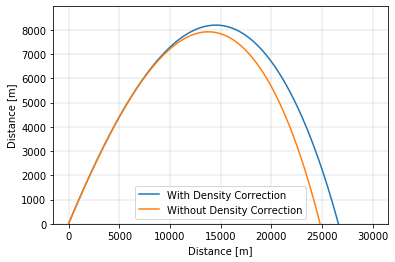

In [11]:
from numpy import array,arange,pi,sqrt,square,cos,sin,exp
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim

# Define our ordinary differential equations
def fconstant(r,t):
    π = pi
    ρ0 = 1.275  # density of air
    g = 9.8     # gravity
    y0 = 1e4    # sea level [m]
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    
    ρ = ρ0 * exp(-y/y0)    # constant density
    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    drag0 = 4e-5  # drag at y = 0
    drag = (ρ/ρ0)*drag0               # constant drag change
    fxx = -drag*vx*v 
    fyy = -g -drag*vy*v 
    
    return array([vx,fxx,vy,fyy],float)

# Time range and step size
a = 0.0
b = 100.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)

xconstantpoints = []
yconstantpoints = []
vxconstantpoints = []
vyconstantpoints = []

θ = 45*pi/180

r = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xconstantpoints.append(r[0])
    yconstantpoints.append(r[2])
    vxconstantpoints.append(r[1])
    vyconstantpoints.append(r[3])
    
    k1 = h*fconstant(r,t)
    k2 = h*fconstant(r+0.5*k1,t+0.5*h)
    k3 = h*fconstant(r+0.5*k2,t+0.5*h)
    k4 = h*fconstant(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

    

# Define our ordinary differential equations
def fvariable(r,t):
    π = pi
    ρ0 = 1.275      # density of air
    g = 9.8         # gravity
    y0 = 1e4        # sea-level [m] 
    T0 = 273.15     # temperature at sea-level in Kelvin
    a = 6.5e-3      # constant for air [K/m]
    α = 2.5         # constant for air
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    
    ρ = ρ0 * (1 - (a*y)/T0)**(α)  # variable density 
    
    v = sqrt(square(vx)+square(vy)) # velocity
    
    drag0 = 4e-5 # drag at y = 0 
    drag = (ρ/ρ0)*drag0              # variable drag change
    fxx = -drag*vx*v 
    fyy = -g -drag*vy*v 
    
    return array([vx,fxx,vy,fyy],float)

xvariablepoints = []
yvariablepoints = []
vxvariablepoints = []
vyvariablepoints = []

r = array([0.0,700*cos(θ),0.0,700*sin(θ)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xvariablepoints.append(r[0])
    yvariablepoints.append(r[2])
    vxvariablepoints.append(r[1])
    vyvariablepoints.append(r[3])
    
    k1 = h*fvariable(r,t)
    k2 = h*fvariable(r+0.5*k1,t+0.5*h)
    k3 = h*fvariable(r+0.5*k2,t+0.5*h)
    k4 = h*fvariable(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plot(xconstantpoints,yconstantpoints,xvariablepoints,yvariablepoints)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend(['With Density Correction','Without Density Correction'])
ylim(bottom=0)
grid(color='k', linestyle='-', linewidth=0.1)

show()

---  

**Problem 5: Baseball - motion of a batted ball**

The drag coefficient $C$ is a complicated function as shown in the figure.  The drag factor for a normal baseball can be approximated by the function

$$
\frac{B_2}{m} = 0.0039 + \frac{0.0058}{1+\exp[(v-v_d)/\Delta]}
$$

with $v_d = 35$ m/s and $\Delta = 5$ m/s.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/baseball-drag-coef.png" />

In a vacuum, a typical batted ball ($v_0 = 50$ m/s, $\theta=45^\circ$) would fly over 800 feet before landing.  

If we assume the wind is blowing horizontally (along $x$) with a constant magnitude and direction, then the components of the drag force become

\begin{align}
F_{drag,x} &= -B_2|\vec v - \vec v_{wind}|(v_x - v_{wind})\\
F_{drag,x} &= -B_2|\vec v - \vec v_{wind}| v_y
\end{align}

Modify your previous cannon shell program to include velocity dependent drag force and the effect of wind.  Typical results are shown in the figure below. 

(a) Calculate the range at seal level, with no wind, of a ball hit at 110 mph (49 m/s) for different initial angles.  Determine to within $1^\circ$ the angle that gives the maximum range.

(b) Determine the initial angles that give the maximum range for a ball hit at 110 mph into a 25-mph head wind, and with a 24-mph tail wind.  What are the maximum ranges in the two cases?

(c) Calculate how much a fastball slows down on it's way to home plate.  Assume a pitch that leaves the pitchers hand at 100 mph and find its speed when it crosses home plate, which is 60.5 feet away.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/baseball-batted.png" />
---


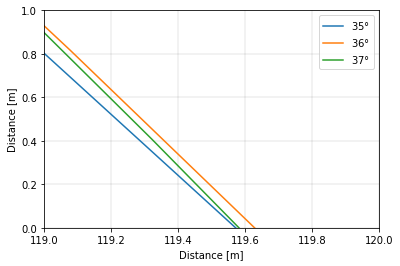

In [12]:
from numpy import array,arange,pi,sqrt,square,cos,sin,exp
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim,xlim

# Define our ordinary differential equations
def fno(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]

    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v)*(vx) 
    fyy = -g -B2*(v)*vy
    
    return array([vx,fxx,vy,fyy],float)

# Time range and step size
a = 0.0
b = 6.0
N = 100
h = (b-a)/N

tpoints = arange(a,b,h)

xno1points = []
yno1points = []
vxno1points = []
vyno1points = []

xno2points = []
yno2points = []
vxno2points = []
vyno2points = []

xno3points = []
yno3points = []
vxno3points = []
vyno3points = []

θ1 = 35*pi/180
θ2 = 36*pi/180
θ3 = 37*pi/180

r1 = array([0.0,49*cos(θ1),0.0,49*sin(θ1)],float)
r2 = array([0.0,49*cos(θ2),0.0,49*sin(θ2)],float)
r3 = array([0.0,49*cos(θ3),0.0,49*sin(θ3)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xno1points.append(r1[0])
    yno1points.append(r1[2])
    vxno1points.append(r1[1])
    vyno1points.append(r1[3])
    
    k1 = h*fno(r1,t)
    k2 = h*fno(r1+0.5*k1,t+0.5*h)
    k3 = h*fno(r1+0.5*k2,t+0.5*h)
    k4 = h*fno(r1+k3,t+h)
    r1 += (k1+2*k2+2*k3+k4)/6

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xno2points.append(r2[0])
    yno2points.append(r2[2])
    vxno2points.append(r2[1])
    vyno2points.append(r2[3])
    
    k1 = h*fno(r2,t)
    k2 = h*fno(r2+0.5*k1,t+0.5*h)
    k3 = h*fno(r2+0.5*k2,t+0.5*h)
    k4 = h*fno(r2+k3,t+h)
    r2 += (k1+2*k2+2*k3+k4)/6
    
# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xno3points.append(r3[0])
    yno3points.append(r3[2])
    vxno3points.append(r3[1])
    vyno3points.append(r3[3])
    k1 = h*fno(r3,t)
    k2 = h*fno(r3+0.5*k1,t+0.5*h)
    k3 = h*fno(r3+0.5*k2,t+0.5*h)
    k4 = h*fno(r3+k3,t+h)
    r3 += (k1+2*k2+2*k3+k4)/6    

    
plot(xno1points, yno1points,
     xno2points, yno2points,
     xno3points, yno3points)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend(['35$\degree$','36$\degree$','37$\degree$'])
ylim(0,1)
xlim(119,120)
grid(color='k', linestyle='-', linewidth=0.1)

show()

The maximum distance is about 119.65 meters. This is given by an angle of 36 degrees.

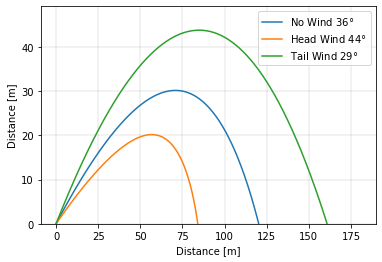

In [13]:
from numpy import array,arange,pi,sqrt,square,cos,sin,exp
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim

# Define our ordinary differential equations
def fno(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]

    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v)*(vx) 
    fyy = -g -B2*(v)*vy
    
    return array([vx,fxx,vy,fyy],float)

def fhead(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]

    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    vwind = -11.176   # m/s = 25mph
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v-vwind)*(vx-vwind) 
    fyy = -g -B2*(v-vwind)*vy
    
    return array([vx,fxx,vy,fyy],float)

def ftail(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]

    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    vwind = 10.729   # m/s = 24 mph
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v-vwind)*(vx-vwind) 
    fyy = -g -B2*(v-vwind)*vy
    
    return array([vx,fxx,vy,fyy],float)


# Time range and step size
a = 0.0
b = 7.0
N = 700
h = (b-a)/N

tpoints = arange(a,b,h)

xnopoints = []
ynopoints = []
vxnopoints = []
vynopoints = []

xheadpoints = []
yheadpoints = []
vxheadpoints = []
vyheadpoints = []

xtailpoints = []
ytailpoints = []
vxtailpoints = []
vytailpoints = []


θ1 = 36*pi/180

r = array([0.0,49.1744*cos(θ1),0.0,49.1744*sin(θ1)],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xnopoints.append(r[0])
    ynopoints.append(r[2])
    vxnopoints.append(r[1])
    vynopoints.append(r[3])
    
    k1 = h*fno(r,t)
    k2 = h*fno(r+0.5*k1,t+0.5*h)
    k3 = h*fno(r+0.5*k2,t+0.5*h)
    k4 = h*fno(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

θ2 = 29*pi/180

r = array([0.0,49.1744*cos(θ2),0.0,49.1744*sin(θ2)],float)

for t in tpoints:
    xheadpoints.append(r[0])
    yheadpoints.append(r[2])
    vxheadpoints.append(r[1])
    vyheadpoints.append(r[3])
    
    k1 = h*fhead(r,t)
    k2 = h*fhead(r+0.5*k1,t+0.5*h)
    k3 = h*fhead(r+0.5*k2,t+0.5*h)
    k4 = h*fhead(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

θ3 = 44*pi/180

r = array([0.0,49.1744*cos(θ3),0.0,49.1744*sin(θ3)],float)


for t in tpoints:
    xtailpoints.append(r[0])
    ytailpoints.append(r[2])
    vxtailpoints.append(r[1])
    vytailpoints.append(r[3])
    
    k1 = h*ftail(r,t)
    k2 = h*ftail(r+0.5*k1,t+0.5*h)
    k3 = h*ftail(r+0.5*k2,t+0.5*h)
    k4 = h*ftail(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6    
    
plot(xnopoints, ynopoints,
     xheadpoints, yheadpoints,
     xtailpoints, ytailpoints)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend(['No Wind 36$\degree$', 'Head Wind 44$\degree$', 'Tail Wind 29$\degree$'])
ylim(bottom=0)
grid(color='k', linestyle='-', linewidth=0.1)

show()

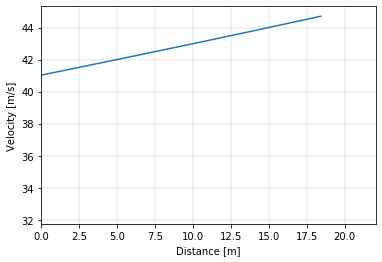

In [14]:
from numpy import array,arange,pi,sqrt,square,cos,sin,exp
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim,xlim

# Define our ordinary differential equations
def fno(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]

    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v)*(vx) 
    fyy = -g -B2*(v)*vy
    
    return array([vx,fxx,vy,fyy],float)

# Time range and step size
a = 0.0
b = 2.0
N = 300
h = (b-a)/N

tpoints = arange(a,b,h)

xno1points = []
yno1points = []
vxno1points = []
vyno1points = []
vpoints = []

r1 = array([18.4404,44.704*cos(pi),0.0,0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xno1points.append(r1[0])
    yno1points.append(r1[2])
    vxno1points.append(r1[1])
    vyno1points.append(r1[3])
    vpoints.append(sqrt(square(r1[1]) + square(r1[3])))
    k1 = h*fno(r1,t)
    k2 = h*fno(r1+0.5*k1,t+0.5*h)
    k3 = h*fno(r1+0.5*k2,t+0.5*h)
    k4 = h*fno(r1+k3,t+h)
    r1 += (k1+2*k2+2*k3+k4)/6

    
plot(xno1points, vpoints)
ylabel("Velocity [m/s]")
xlabel("Distance [m]")
grid(color='k', linestyle='-', linewidth=0.1)
xlim(left = 0)
show()

In [15]:
xno1points[65],vpoints[65]

(-0.08008853288665002, 41.01062588781231)

The velocity of the baseball as it crosses home plate is around 91.74 mph

---

**Problem 6: Crosswind**

Consider the effect of a crosswind on the trajectory of a flyball.  How much will a wind of 10 mph directed at right angles to the initial velocity alter the place where one of the fly balls in the figure above?




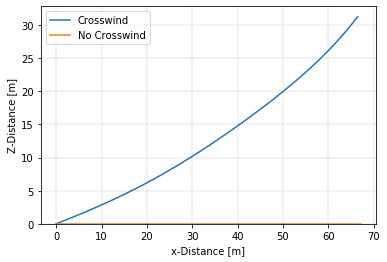

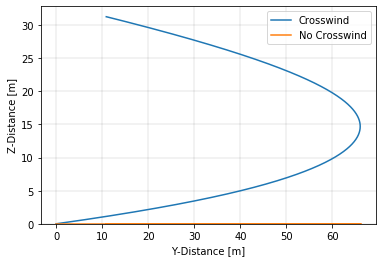

In [16]:
from numpy import array,arange,pi,sqrt,square,cos,sin,exp
from pylab import plot,xlabel,ylabel,show, grid, legend,ylim,xlim
from mpl_toolkits import mplot3d



# Define our ordinary differential equations
def fcross(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    
    z = r[4]
    vz = r[5]
    
    v = sqrt(square(vx)+square(vy)+square(vz))  # velocity
    
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v)*(vx) 
    fyy = -g -B2*(v)*vy
    fzz = 0
    
    return array([vx,fxx,vy,fyy,vz,fzz],float)

# Define our ordinary differential equations
def fno(r,t):
    π = pi
    g = 9.8     # gravity
    
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
     
    z = r[4]
    vz = r[5]
    
    v = sqrt(square(vx)+square(vy))  # velocity
    
    vd = 35     # m/s
    Δ = 5       # m/s
    
    B2 = 0.0039 + 0.0058/(1+exp((v-vd)/Δ))  # drag factor
                          
    fxx = -B2*(v)*(vx) 
    fyy = -g -B2*(v)*vy
    fzz = 0
    
    return array([vx,fxx,vy,fyy,vz,fzz],float)

# Time range and step size
a = 0.0
b = 7.0
N = 700
h = (b-a)/N

tpoints = arange(a,b,h)

xno1points = []
yno1points = []
vxno1points = []
vyno1points = []

xno2points = []
yno2points = []
vxno2points = []
vyno2points = []

z1points = []
vz1points = []

z2points = []
vz2points = []


θ1 = 70*pi/180

r1 = array([0.0,49*cos(θ1),0.0,49*sin(θ1),0,4.4704],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xno1points.append(r1[0])
    yno1points.append(r1[2])
    vxno1points.append(r1[1])
    vyno1points.append(r1[3])

    z1points.append(r1[4])
    vz1points.append(r1[5])
    
    k1 = h*fcross(r1,t)
    k2 = h*fcross(r1+0.5*k1,t+0.5*h)
    k3 = h*fcross(r1+0.5*k2,t+0.5*h)
    k4 = h*fcross(r1+k3,t+h)
    r1 += (k1+2*k2+2*k3+k4)/6


r2 = array([0.0,49*cos(θ1),0.0,49*sin(θ1),0,0],float)

# Solve the ode using fourth-order Runge-Kutta
for t in tpoints:
    xno2points.append(r2[0])
    yno2points.append(r2[2])
    vxno2points.append(r2[1])
    vyno2points.append(r2[3])
    
    z2points.append(r2[4])
    vz2points.append(r2[5])
        
    k1 = h*fno(r2,t)
    k2 = h*fno(r2+0.5*k1,t+0.5*h)
    k3 = h*fno(r2+0.5*k2,t+0.5*h)
    k4 = h*fno(r2+k3,t+h)
    r2 += (k1+2*k2+2*k3+k4)/6
    
plot(xno1points, z1points,
     xno2points, z2points)
xlabel("x-Distance [m]")
ylabel("Z-Distance [m]")
grid(color='k', linestyle='-', linewidth=0.1)
legend(['Crosswind','No Crosswind'])
ylim(bottom = 0)
show()

plot(yno1points, z1points,
     yno2points, z2points)
xlabel("Y-Distance [m]")
ylabel("Z-Distance [m]")
grid(color='k', linestyle='-', linewidth=0.1)
legend(['Crosswind','No Crosswind'])
ylim(bottom = 0)
show()

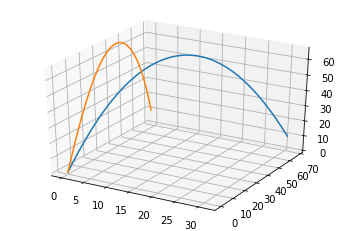

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(z1points, xno1points, yno1points)
ax.plot3D(z2points, xno2points, yno2points)

As shown above a wind of 10 mph will alter the path of the ball significantly (~30 meters). 

---

**Problem 7: Golf Drive**

In golf, the backspin of the driven ball gives a magnus force that can be stronger than the gravitational force (the trajectory curves upward).   The equations of motion for the golf ball are then

\begin{align}
\frac{dv_x}{dt} &= -\frac{F_{drag,x}}{m} - \frac{S_0\omega v_y}{m}\\
\frac{dv_y}{dt} &= -\frac{F_{drag,y}}{m} - \frac{S_0\omega v_x}{m} -g
\end{align}

Again the drag for a golf ball is a function of velocity, with $C\approx 1/2$ at low velocities ($v\le 14$ m/s) and $C\approx 7.0/v$ ($v$ in m/s) at high velocities ($>14$ m/s).  Use

$$F_{drag} = -C\rho A v^2$$

For the Magnus force, estimate $S_0\omega/m\approx 0.25\rm\ s^{-1}$. 

Again use the Euler method to integrate the trajectory.  Assume an initial velocity of 70 m/s.   Show that the maximum range occurs for a 'firing angle' that is surprisingly low.  Simulate extra backspin by increasing $S_0\omega/m$ by 50%, and no backspin by setting it to zero.  Finally, calculate the trajectory of a smooth ball by using the appropriate drag coefficient.  (in other words, try to recreate this figure)

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/golf-drive.png" />

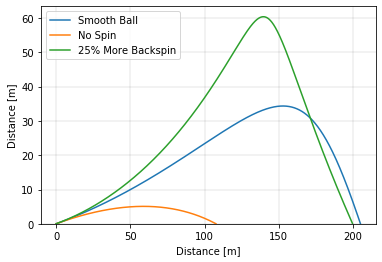

In [18]:
# John helped me on this problem

from pylab import plot, show, legend, xlabel, ylabel, title
from numpy import  arange, array, cos, sin, pi, sqrt, exp

v0 = 70   #[m/s]

rho = 1.275    # density of air [kg m^3]
A = pi * 42.67e-3**2 / 4.0  # surface area of a golf ball [m^2]
g = 9.81     # gravity
a = 0        # a and b set up our time and time step
b = 100 
m = 45.93e-3  # mass of a golf ball

def f(r,t):
    magnus = 0.25  # [s^-1]
    x, y, vx, vy = r[0], r[1], r[2], r[3]
    
    v = sqrt(vx**2+vy**2)
    s = abs(v)
    if (s <= 14):
        C = 0.5
    else:
        C = 7.0/v
    drag_x = C*rho*A*vx*v
    drag_y = C*rho*A*vy*v
    fxx = -drag_x/m-magnus*vy
    fyy = -g-drag_y/m+magnus*vx
    return array([vx,vy,fxx,fyy],float)

def fno(r,t):
    magnus = 0.0  # [s^-1]
    x, y, vx, vy = r[0], r[1], r[2], r[3]
    
    v = sqrt(vx**2+vy**2)
    s = abs(v)
    if (s <= 14):
        C = 0.5
    else:
        C = 7.0/v
    drag_x = C*rho*A*vx*v
    drag_y = C*rho*A*vy*v
    fxx = -drag_x/m-magnus*vy
    fyy = -g-drag_y/m+magnus*vx
    return array([vx,vy,fxx,fyy],float)

def fextra(r,t):
    magnus = 0.375 #[s^-1]
    x, y, vx, vy = r[0], r[1], r[2], r[3]
    
    v = sqrt(vx**2+vy**2)
    s = abs(v)
    if (s <= 14):
        C = 0.5
    else:
        C = 7.0/v
    drag_x = C*rho*A*vx*v
    drag_y = C*rho*A*vy*v
    fxx = -drag_x/m-magnus*vy
    fyy = -g-drag_y/m+magnus*vx
    return array([vx,vy,fxx,fyy],float)

def rk4(a,b,f,theta):
    N = 10000
    h = (b-a)/N
    tpoints = arange(a,b,h)

    xpoints = []
    ypoints = []
    vxpoints = []
    vypoints = []
    r = array([0,0,v0*cos(theta/180*pi),v0*sin(theta/180*pi)],float)
    
    for t in tpoints:
        if (r[1] >= 0):
            xpoints.append(r[0])
            ypoints.append(r[1])
            vxpoints.append(r[2])
            vypoints.append(r[3])
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1,t+0.5*h)
            k3 = h*f(r+0.5*k2,t+0.5*h)
            k4 = h*f(r+k3,t+h)
            r += (k1+2*k2+2*k3+k4)/6
    return xpoints, ypoints, vxpoints, vypoints

xpoints, ypoints, vxpoints, vypoints = rk4(a,b,f,9)
x1points, y1points, vx1points, vy1points = rk4(a,b,fno,9)
x2points, y2points, vx2points, vy2points = rk4(a,b,fextra,9)

plot(xpoints, ypoints,x1points,y1points,x2points,y2points)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend(['Smooth Ball', 'No Spin', '25% More Backspin'])
ylim(bottom=0)
grid(color='k', linestyle='-', linewidth=0.1)

show()

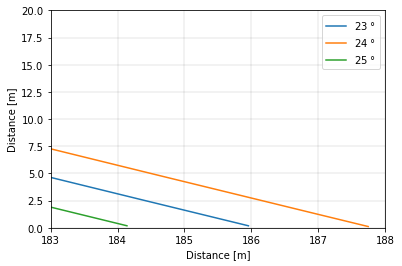

In [19]:
xpoints, ypoints, vxpoints, vypoints = rk4(a,b,f,24)
x1points, y1points, vx1points, vy1points = rk4(a,b,f,23)
x2points, y2points, vx2points, vy2points = rk4(a,b,f,25)

plot(xpoints, ypoints,x1points,y1points,x2points,y2points)
xlabel("Distance [m]")
ylabel("Distance [m]")
legend(['23 $\degree$', '24 $\degree$', '25 $\degree$'])
ylim(0,20)
xlim(183,188)
grid(color='k', linestyle='-', linewidth=0.1)

show()

Hitting at 24 degrees will give you the maximum distance. 

---
**Problem 0: Molecular Dynamics First Steps**

In class we viewed the Washington Post article showing a live simulator of the spread of COVID-19:

https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

This is a molecular dynamics (MD) simulation.  Your first steps down this path are

<ul>
    <li>Write Python code that will simulate the motion of a particle in a box (2D) with reflective boundary conditions (we will later do periodic boundary conditions)</li>
    <li>Write a Python function to initialize the positions and velocities of $N$ particles</li>
    <li>Write code to visualize the motions of the $N$ particles</li>
</ul>

Note:  This problem isn't graded, since it's going to be used later on - I just wanted to get you to start thinking about these things and working towards our eventual MD code ($N$ particles, periodic boundary conditions, interacting via a force law, with speed distribution histogram calculated every $N_{\rm samp}$ time steps.  

You may decide to do the problem in a compiled language, and that is fine as long as it is your work and it gives the same results (visualization) that the Python environment students will be getting.  I'm on a Mac, so probably won't be able to run the code that you compile.  You might elect in this case to turn in the code (emailing the .c, .cpp, or .f files is fine), and a movie that you made (e.g., link to youtube upload or Dropbox share).  

You may also decide to do this using vpython, and in fact the home page for vpython.org shows a particle in a box (3D) with reflecting boundary conditions to help get you started.

In [20]:
# John helped me with this problem
import numpy as np
from vpython import *
from random  import random
#GlowScript 2.9 VPython

scene.caption = """To rotate "camera", drag with right button or Ctrl-drag.
To zoom, drag with middle button or Alt/Option depressed, or use scroll wheel.
  On a two-button mouse, middle is left + right.
To pan left/right and up/down, Shift-drag.
Touch screen: pinch/extend to zoom, swipe or two-finger rotate."""

side = 4.0
thk = 0.3
s2 = 2*side - thk
s3 = 2*side + thk

wallR = box (pos=vector( side, 0, 0), size=vector(thk, s2, 0),  color = color.red)
wallL = box (pos=vector(-side, 0, 0), size=vector(thk, s2, 0),  color = color.red)
wallB = box (pos=vector(0, -side, 0), size=vector(s3, thk, 0),  color = color.blue)
wallT = box (pos=vector(0,  side, 0), size=vector(s3, thk, 0),  color = color.blue)
wallBK = box(pos=vector(0, 0, -side), size=vector(s2, s2,  0),  color = color.gray(0.7))




Nballs = []
Nballpos = []

v0 = 1
v = []

N = 10 # number of balls



# only 2D
for i in range(N):
    x_pos = side*random()-side/2
    y_pos = side*random()-side/2
    z_pos = 0

    Nballs.append(sphere(color = color.green, radius = 0.1, make_trail=False, retain=200))
    Nballpos.append(vector(x_pos,y_pos,z_pos)) 
    
    θ = np.pi*random()
    vx = v0*cos(θ)
    vy = v0*sin(θ)
    vz = 0
    
    v.append(vector(vx,vy,0))
    
side = side - thk*0.5

dt = 0.3

while True:
    rate(30)
    
    for i in range(N): 
        Nballs[i].pos = Nballpos[i] = Nballpos[i] + (v[i])*dt
    
    for i in range(N):
        loc = Nballpos[i]
        
        if abs(loc.x) > side:
            if loc.x < 0: v[i].x =  abs(v[i].x)
            else: v[i].x =  -abs(v[i].x)
        
        if abs(loc.y) > side:
            if loc.y < 0: v[i].y = abs(v[i].y)
            else: v[i].y =  -abs(v[i].y)
        
        if abs(loc.z) > side:
            if loc.z < 0: v[i].z =  abs(v[i].z)
            else: v[i].z =  -abs(v[i].z)
                    

KeyboardInterrupt: 